In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
%timeit
# %pdb
from tqdm import tqdm
import matplotlib # 注意这个也要import一次
import matplotlib.pyplot as plt
print(plt.style.available)
# [u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']
plt.style.use('ggplot')          # 配色

['seaborn-paper', 'seaborn-whitegrid', 'seaborn-dark', 'fivethirtyeight', 'bmh', 'seaborn-ticks', 'seaborn-poster', 'seaborn-colorblind', 'fast', 'ggplot', 'seaborn-muted', 'seaborn-pastel', 'seaborn-notebook', 'seaborn-white', 'seaborn-talk', 'seaborn-deep', 'classic', '_classic_test', 'tableau-colorblind10', 'grayscale', 'dark_background', 'seaborn', 'seaborn-bright', 'seaborn-dark-palette', 'seaborn-darkgrid', 'Solarize_Light2']


# 查看数据

In [ ]:
test_path = './data/zhengqi_test.txt'
train_path = './data/zhengqi_train.txt'
test_df = pd.read_csv(test_path, sep = '\t')
train_df = pd.read_csv(train_path, sep = '\t')

In [66]:
train_df.sample(2)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
336,1.967,1.421,0.804,0.537,1.234,-0.627,-0.049,-0.030,1.827,0.042,...,1.227,0.496,1.275,0.924,-0.843,0.16,0.364,0.741,-1.107,1.495
388,0.727,0.493,0.398,-0.264,0.236,-0.417,-0.557,-1.149,0.411,-1.252,...,-0.477,-0.817,0.400,-0.781,-0.843,0.16,0.364,0.722,-0.145,0.675


## 查看数据概况 一共2888条记录

In [67]:
# test_df.describe()
train_df.describe()
# test_df.info()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


### 绘制箱型图

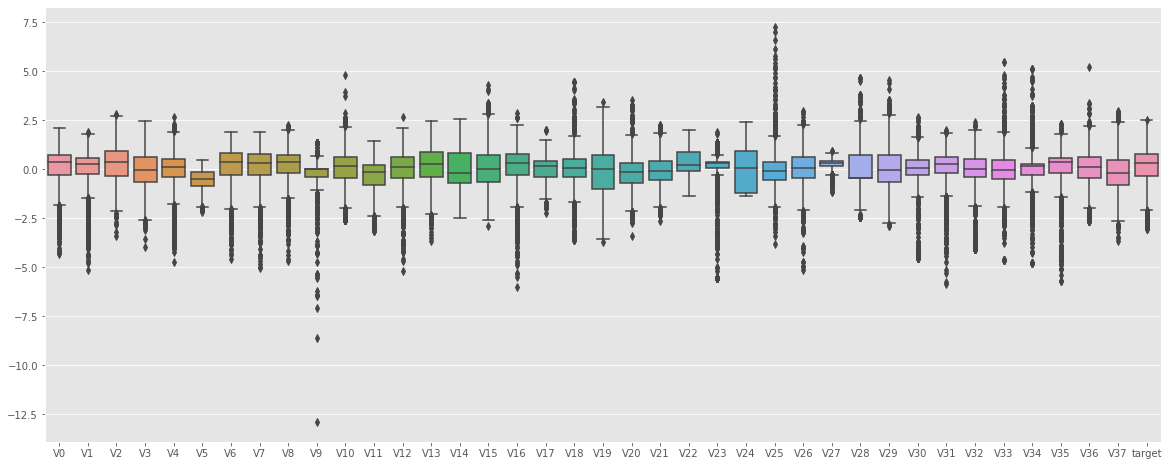

In [5]:
f, axes = plt.subplots(1, 1, figsize = (20, 8))
sns.boxplot(data = train_df)

In [6]:
train_input_df = train_df.loc[ :, train_df.columns[:-1] ] 
train_input_df['origin'] = 'train'
test_input_df = test_df
test_input_df['origin'] = 'test'
data_input_all = pd.concat([train_input_df, test_input_df],
                          axis = 0, ignore_index=True)

### 可视化训练集和测试集的分布，其中可观察到*V5*、*V17*、*V22*分布不符

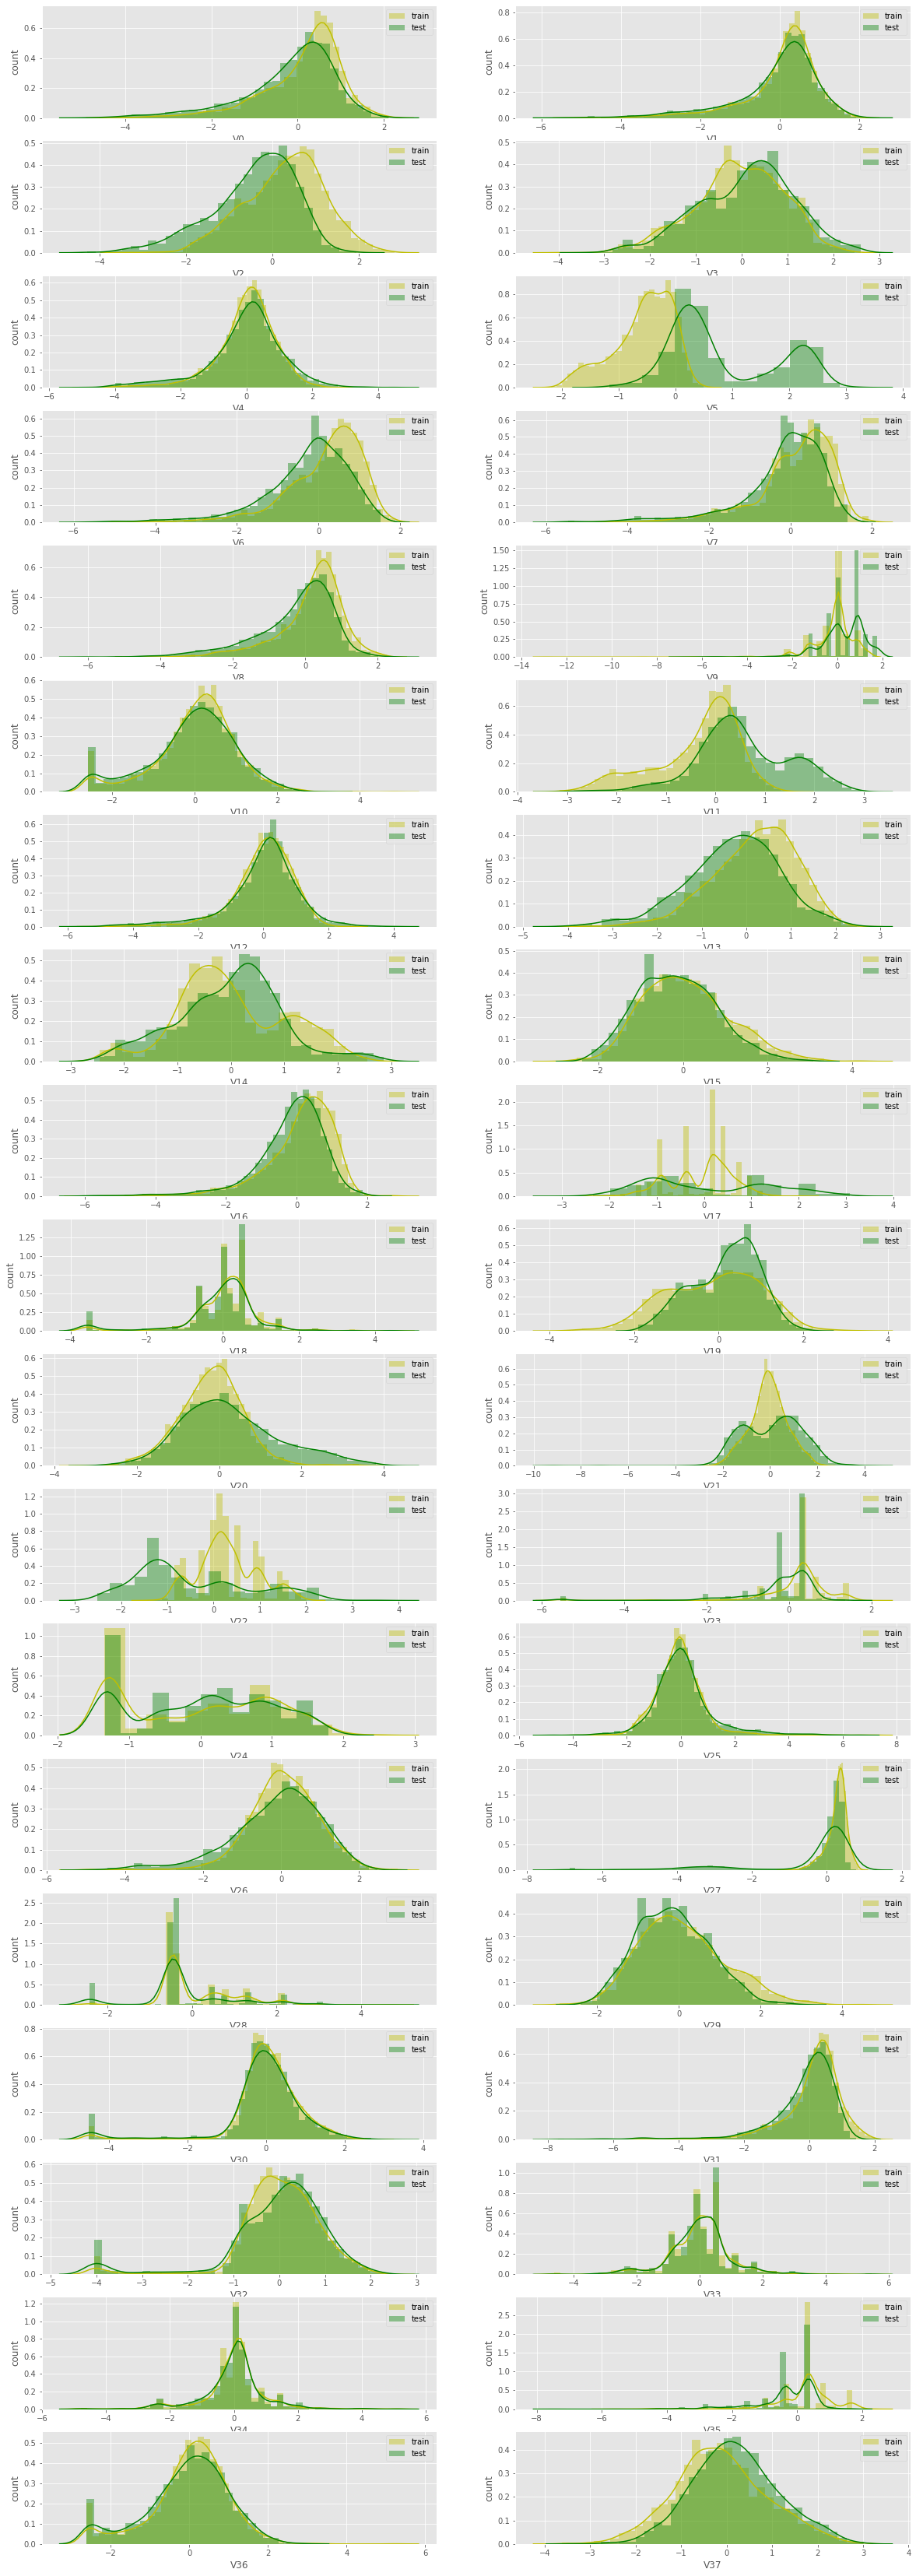

In [7]:
plt.figure(figsize=(20, 60))    # 指定画布尺寸
index = 1
for v in data_input_all.columns[:-1]:
    plt.subplot(19, 2, index)     # 画出子图
    axis = sns.distplot(a=train_input_df[v], color='y')              # 画出训练集分布
    axis = sns.distplot(a=test_input_df[v], color='g', ax=axis)      # 画出测试集分布
    axis.set_xlabel(v)
    axis.set_ylabel('count')
    axis = axis.legend(['train', 'test'])
    index += 1
plt.show()
#     ax_vio = sns.violinplot(data=data_input_all, y=v, hue='origin', palette="Set3")  本来想画小提琴

画一个测试集相关系数热力图

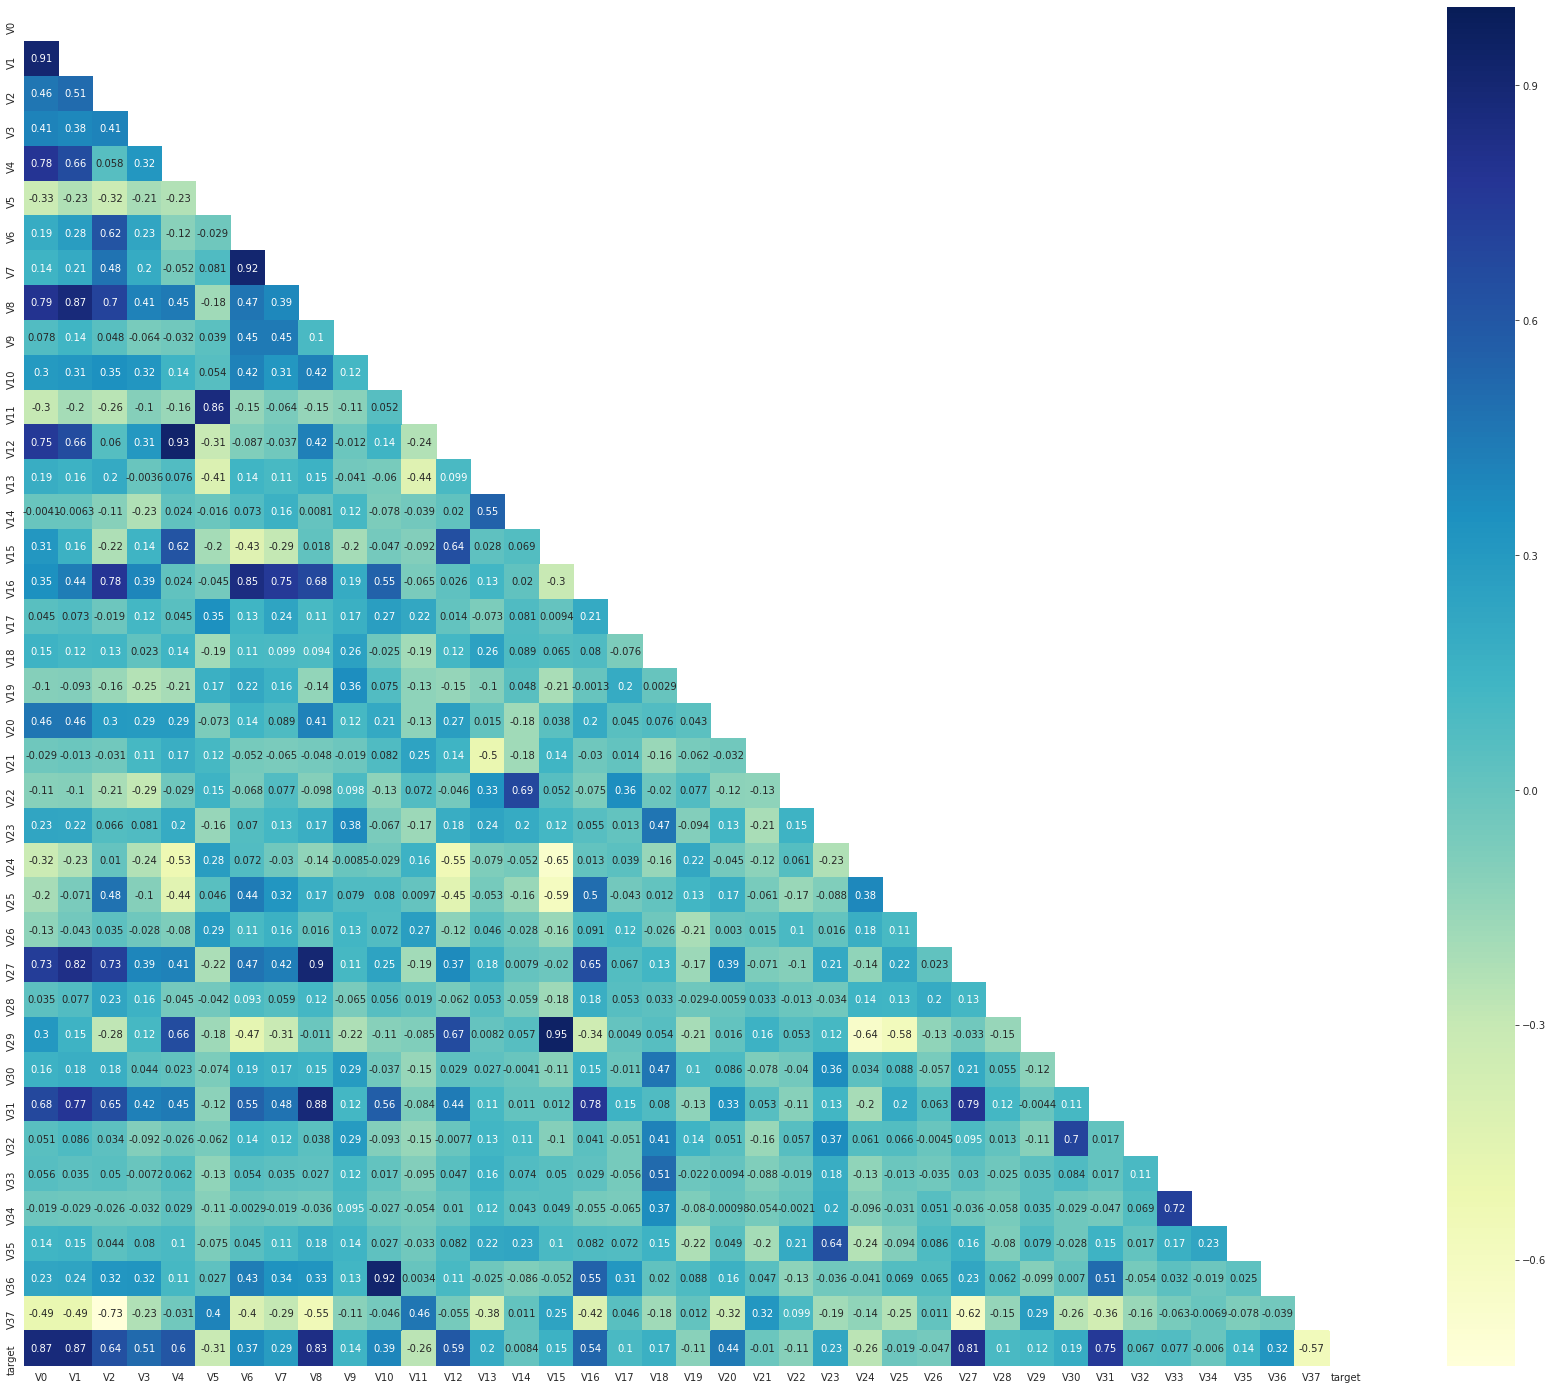

In [8]:
plt.figure(figsize=(30,25))
# train_input_temp = train_df.loc[ :, train_df.columns[:-1] ]   # 取训练输入 V0-V37
# train_input_corr = np.corrcoef(train_input_temp)    皮尔逊积矩相关系数 需要x, y
train_corr = train_df.corr()
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    axis_heat = sns.heatmap(train_corr, mask=mask, cmap="YlGnBu", annot=True)
plt.show()

## 手工特征提取——**传 统 艺 能**
- 发现target项与**V0、V1、V8、V27、V31**之间的相关系数比较高，与**V37、V5、V11、V22、V24**之间的相关系数较低，而后者与其他列的相关系数也较低
- 其中**V15与V29**相关系数为**0.95**，前者在下方的LassoCV方法中被筛选，个人认为是去重线性模型，同样被筛选的还有**V21、V31**，后者与**V0、V1、V8、V27**的相关系数也较高，同理可以删去
- 测试集与训练集的输入之间*V5*、*V17*、*V22*分布不符，可以考虑筛选去**V17**

In [9]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold,learning_curve,KFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.pipeline import Pipeline

# 导入算法库
from sklearn.linear_model import LinearRegression,Ridge,LassoCV,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBClassifier,XGBRegressor
# import xgboost as xgb
# from xgboost import plot_importance
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from random import shuffle
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import svm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
 
# plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号

使用**Lasso**模型方法，压缩系数（使该特征系数为0），处理具有**复共线性数据**（？？？）的有偏估计

Lasso picked 35 variables and eliminated the other 3 variables
V0 coef :0.34517804371922495
V1 coef :0.18775401789321608
V2 coef :0.16610600359031583
V3 coef :0.12491907503755281
V4 coef :0.030809761139293804
V5 coef :-0.06442209530358571
V6 coef :0.11581574029996754
V7 coef :-0.14845695797731234
V8 coef :-0.14768937842724458
V9 coef :0.03463974060157409
V10 coef :0.2936125659584186
V11 coef :0.026167678540600026
V12 coef :0.09592450664949695
V13 coef :-0.0016454298138454135
V14 coef :0.052781231543311255
V15 coef :-0.0
V16 coef :0.02313691153108295
V17 coef :0.08471209774527044
V18 coef :0.011791623124814236
V19 coef :0.01452585279366172
V20 coef :0.005791381461300701
V21 coef :0.0
V22 coef :0.01289743308713453
V23 coef :0.012298138504428848
V24 coef :-0.04113329279115219
V25 coef :-0.01977384931706301
V26 coef :0.018327157381290565
V27 coef :0.9525273498117969
V28 coef :-0.007173728339360602
V29 coef :-0.03530345379819596
V30 coef :0.013064070898935883
V31 coef :-0.0
V32 coef :-0.002

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

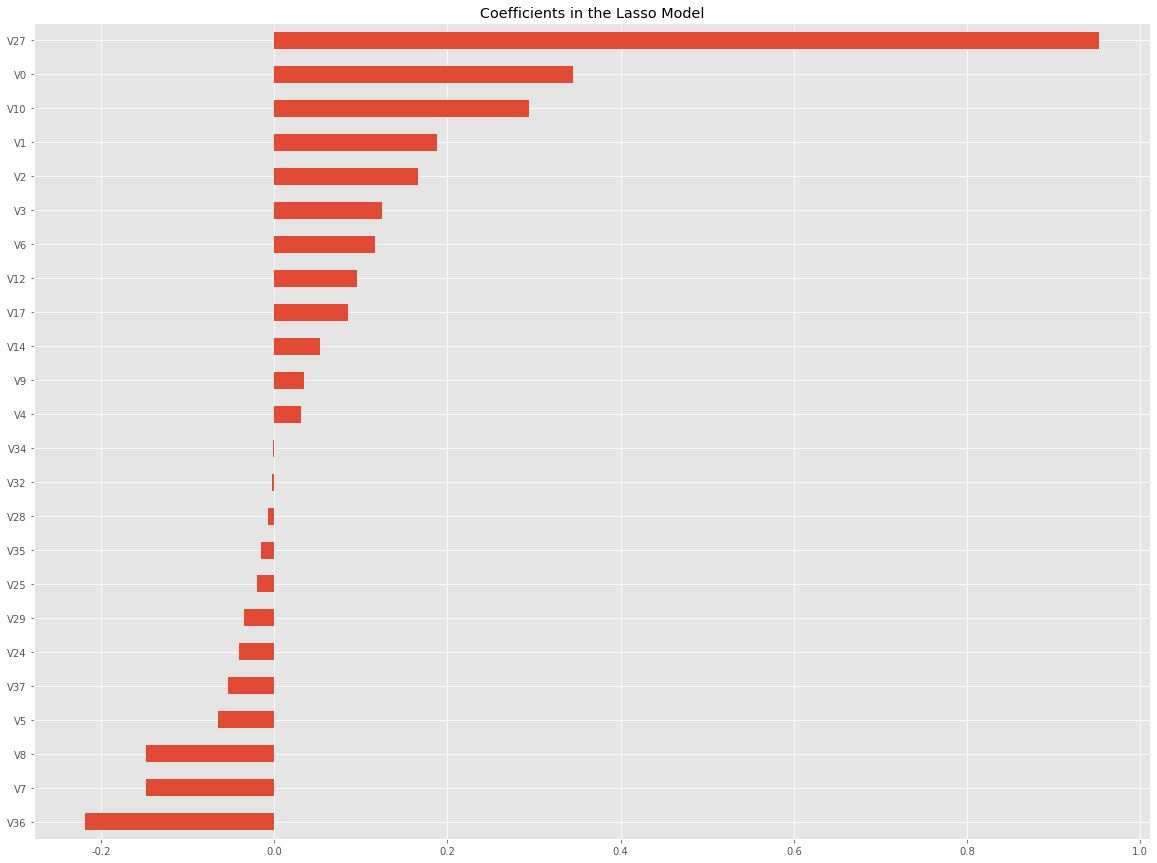

In [10]:
X_train = train_df.loc[ :, train_df.columns[:-1] ]   # 取 输入
y = train_df.loc[:, 'target']
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y) # 此处 alpha 为通常值 #fit 把数据套进模型里跑
coef = pd.Series(model_lasso.coef_, index = X_train.columns)             # .coef_ 可以返回经过学习后的所有 feature 的参数。
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
for c in coef.index:
    print(c + " coef :" + str(coef[c]))
imp_coef = pd.concat([coef.sort_values().head(12), 
                     coef.sort_values().tail(12)])                       #选头尾各10条，.sort_values() 可以将某一列的值进行排序。
# matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
plt.figure(figsize=(20,15))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")   

- 由上图的特征重要系数可得**最重要的10个**正向系数，和**最重要的10个**负向系数，其他的系数极为靠近0（影响较小），其中*V15、V21、V31*被筛选，系数为0

## 互信息熵回归模型参数
- **V26、V32** 与 target 的互信息熵很低

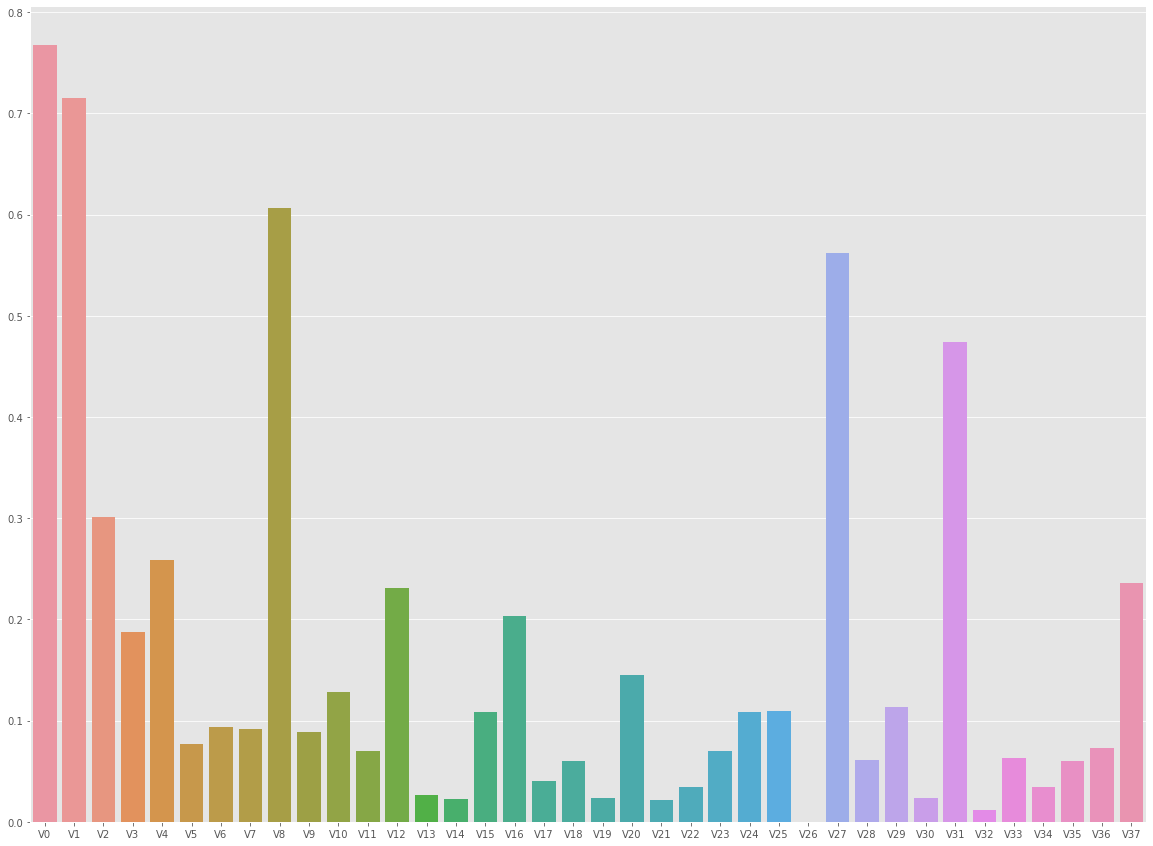

In [11]:
mi_values = mutual_info_regression(X_train, y)
mi = pd.Series(mi_values, index = X_train.columns)
plt.figure(figsize=(20, 15))
sns.barplot(x=mi.index, y=mi)
plt.show()
# for mi in mi_values:
#     print("")

In [12]:
drop_columns = ['V37', 'V5', 'V11', 'V22', 'V24',  'V15', 'V31']
# for column in drop_columns:
manual_train = X_train.drop(drop_columns, axis=1)
manual_train.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V32,V33,V34,V35,V36
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-2.114,-0.940,...,0.796,0.168,-0.450,0.136,0.109,0.327,-4.627,-4.789,-5.101,-2.608
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,-2.114,0.188,...,1.057,0.338,0.671,-0.128,0.124,0.600,-0.843,0.160,0.364,-0.335
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,-2.114,0.874,...,0.915,0.326,1.287,-0.009,0.361,-0.116,-0.843,0.160,0.364,0.765
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,-2.114,0.011,...,0.898,0.277,1.298,0.015,0.417,0.603,-0.843,-0.065,0.364,0.333
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-2.114,-0.251,...,0.386,0.332,1.289,0.183,1.078,0.418,-0.843,-0.215,0.364,-0.280


### 让MLE算法自己选择降维维度的效果, 结果去掉一个特征维度

In [13]:
# 建模
# 问题为回归问题
linear_model = LinearRegression(normalize=True)
ridge_model = Ridge()
gbdt_model = GradientBoostingRegressor()
rf_model = RandomForestRegressor()
svr_model = SVR(gamma=0.01)
xgb_model = XGBRegressor()

In [14]:
# 用训练集去进行模型评分对比
models = [linear_model,ridge_model,gbdt_model,rf_model,svr_model,xgb_model]
models_names = ['linear_model','ridge_model','gbdt_model','rf_model','svr_model','xgb_model']
models_scores_mean = []
st_kflod = StratifiedKFold(n_splits=10,shuffle=False,random_state=0)
for index,model in enumerate(models):
    score = cross_val_score(estimator=model,X=manual_train,y=y,scoring='neg_mean_squared_error',cv=10)
    models_scores_mean.append(-score.mean())
    print(f'{models_names[index]}'+'分数:' + f'{score}'+'平均分:'+f'{-score.mean()}')
    print('-'*50)

linear_model分数:[-0.06835987 -0.1128465  -0.11481509 -0.15746836 -0.06946566 -0.11808027
 -0.13663749 -0.10873578 -0.06915765 -0.24118731]平均分:0.11967539712621016
--------------------------------------------------
ridge_model分数:[-0.06858906 -0.11296451 -0.11520654 -0.15665018 -0.06905546 -0.11762001
 -0.13716252 -0.10897831 -0.06900712 -0.24136601]平均分:0.11965997243598951
--------------------------------------------------
gbdt_model分数:[-0.08922373 -0.12740955 -0.13533467 -0.17461866 -0.07035509 -0.15149299
 -0.1451919  -0.14304674 -0.06898396 -0.27288934]平均分:0.1378546619987787
--------------------------------------------------
rf_model分数:[-0.09742887 -0.12756871 -0.13766462 -0.1737402  -0.07170277 -0.14773021
 -0.15262535 -0.16577334 -0.07082073 -0.27617294]平均分:0.14212277441285767
--------------------------------------------------
svr_model分数:[-0.0816173  -0.11638773 -0.13158514 -0.17280896 -0.06915616 -0.11714758
 -0.14298455 -0.11234799 -0.05402141 -0.26250671]平均分:0.12605635493693898
--

## **无监督**PCA特征降维方法，example中应用于人脸图像识别的特征提取（降维），这里的效果待验证

In [15]:
from sklearn.decomposition import PCA

### 让MLE算法自己选择降维维度的效果, 结果去掉一个特征维度

In [16]:
pca = PCA()
cv = KFold(10)
ridge = BayesianRidge()
# ridge = Ridge()
clf = Pipeline([('pca', pca), ('ridge', ridge)])
clf = GridSearchCV(clf, {
#                          'pca__n_components':[38, 35, 30, 28, 25, 'mle'], 
                         'ridge__compute_score' : [True], 
                         'ridge__alpha_1' : [0.5, 0.1, 0.01, 0.001, 1e-04, 1e-05, 1e-06]}, 
                   n_jobs=1, cv=cv, scoring='neg_mean_squared_error', verbose=1)
# clf.fit(X_train, y)
clf.fit(manual_train, y)
clf.best_params_
print("Best estimator found by grid search:")
print(clf.best_estimator_)
clf.best_score_

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best estimator found by grid search:
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('ridge',
                 BayesianRidge(alpha_1=0.5, alpha_2=1e-06, alpha_init=None,
                               compute_score=True, copy_X=True,
                               fit_intercept=True, lambda_1=1e-06,
                               lambda_2=1e-06, lambda_init=None, n_iter=300,
                               normalize=False, tol=0.001, verbose=False))],
         verbose=False)


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.4s finished


-0.11974345241049349

In [17]:
clf.best_score_          # PCA 无监督降维结果 不太好

-0.11974345241049349

结果发现PCA特征降维最好的居然是保留全部38个特征，（PCA用来无监督学习/分类

In [18]:
pca = PCA(n_components = 38)
train_input = train_df.loc[ :, train_df.columns[:-1] ]   # 取 输入
pca.fit(train_input)
print(pca.explained_variance_ratio_)  #代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分 
print(pca.explained_variance_)        #代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。
print(pca.n_components_)

[0.20244673 0.16072616 0.09815957 0.06484466 0.05768475 0.05557893
 0.0445011  0.03512388 0.03330011 0.03172148 0.02621544 0.02190948
 0.01980076 0.01817169 0.01481894 0.01386843 0.01343999 0.0112387
 0.00985623 0.00917063 0.00881722 0.00778184 0.00639212 0.00634502
 0.00501492 0.00490343 0.00352204 0.00263024 0.00223386 0.00203204
 0.00190096 0.00142035 0.0011005  0.00096422 0.00087655 0.00070931
 0.00056003 0.00021769]
[6.42247556 5.09892096 3.11404124 2.05714992 1.83000682 1.76320119
 1.41176519 1.11427965 1.05642192 1.00634082 0.83166586 0.69506222
 0.62816486 0.57648362 0.47012003 0.43996585 0.42637405 0.3565395
 0.31268187 0.29093144 0.27971977 0.24687331 0.20278533 0.20129112
 0.15909484 0.15555784 0.11173408 0.08344256 0.0708677  0.06446502
 0.06030655 0.04505957 0.03491245 0.03058909 0.0278078  0.0225024
 0.01776668 0.00690613]
38


In [19]:
# xgboost 模型调参
# 要调节的参数
param_grid = {'n_estimators':[600,700,900,1100,1200,1300],
              'learning_rate':[0.0005,0.005,0.01,0.05,0.1,0.2],
              'subsample': [0.2, 0.3, 0.4, 0.6],
              'colsample_bytree': [0.6, 0.75, 0.9, 1],
              'gamma':[0.003,0.005,0.007],
              'max_depth':range(4,10),
              'min_child_weight':[0.8,1,2,3]}
other_params = {
               'learning_rate':0.1,
               'n_estimators':500,
               'max_depth':5,
               'min_child_weight':1,
               'seed':0,
               'sub_sample':0.8,
               'colsample_bytree':0.8,
               'gamma':0,
               'reg_alpha':0,
               'reg_lambda':1}
xgb_model = XGBRegressor(**other_params)
estimator = xgb_model
grid_model = GridSearchCV(estimator=estimator,
                         param_grid=param_grid,
                         scoring='neg_mean_squared_error',
                         verbose=1,n_jobs=40,cv=10)

In [20]:
grid_model.fit(manual_train, y)

Fitting 10 folds for each of 41472 candidates, totalling 414720 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   38.0s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  6.9min
[Parallel(n_jobs=40)]: Done 3970 tasks      | elapsed:  9.5min
[Parallel(n_jobs=40)]: Done 4920 tasks      | elapsed: 13.0min
[Parallel(n_jobs=40)]: Done 5970 tasks      | elapsed: 16.7min
[Parallel(n_jobs=40)]: Done 7120 tasks      | elapsed: 18.9min
[Parallel(n_jobs=40)]: Done 8370 tasks      | elapsed: 21.9min
[Parallel(n_jobs=40)]: Done 9720 tasks      | elapsed: 25.9min
[Parallel(n_jobs=40)]: Done 11170 tasks      | elapsed: 31.4min
[Parallel(n_jobs=40)]: Done 12720 tasks    

[04:23:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=500, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, r...
             param_grid={'colsample_bytree': [0.6, 0.75, 0.9, 1],
                         'gamma': [0.003, 0.005, 0.007],
                         'learning_rate': [0.0005, 0.005, 0.01, 0.05, 0.1, 0.2],
                         'max_depth': range(4, 10),
                         'min_child_weight': [0.8, 1, 2, 3],
        

In [21]:
best_params = grid_model.best_params_            # 之前的最佳参数  学习率:0.01  估计器数:1200 min_child_weight:3  subsample:0.2
best_score = grid_model.best_score_
msg = grid_model.cv_results_          # 该属性为所有超参数组合的分数    
# best_model = msg['params'][grid_model.best_index_]
print(f'最好的参数:{best_params}')
print(f'最好的分数:{best_score}')
# print(f'最好的模型:{best_model}')

最好的参数:{'colsample_bytree': 0.75, 'gamma': 0.005, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 1200, 'subsample': 0.2}
最好的分数:-0.1263877862368277


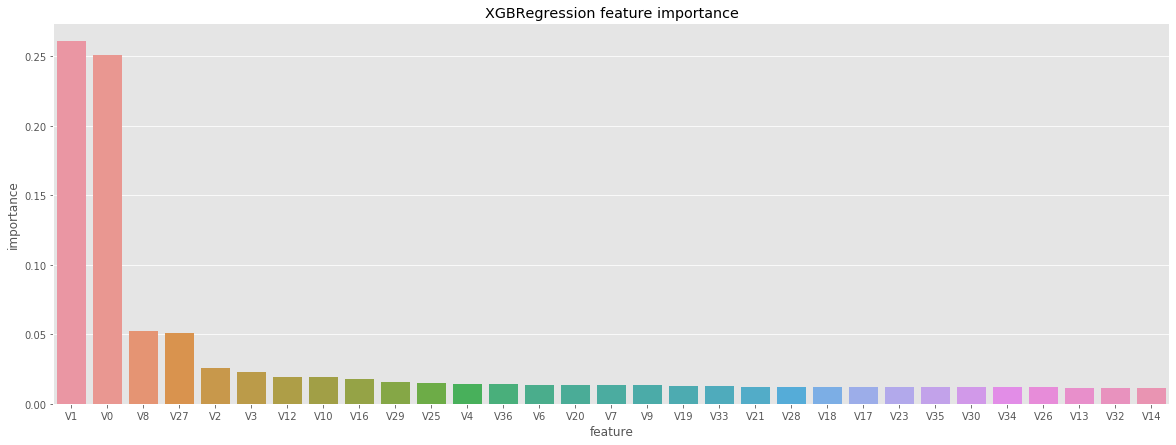

In [40]:
features_grid_sorted = pd.DataFrame({'feature':list(manual_train.columns),
                                    'importance':grid_model.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
plt.figure(figsize=(20, 7))
# features_grid_sorted.plot(kind='barh')
sns.barplot(x=features_grid_sorted['feature'], y=features_grid_sorted['importance'])
plt.title('XGBRegression feature importance')
plt.show()

XGBoost的分数不如**两种线性回归和SVR**模型，应该是手动提取特征的问题

In [47]:
best_params_XGB = best_params
best_params_XGB['seed'] = 0
best_params_XGB['reg_alpha'] = 0
best_params_XGB['reg_lambda'] = 1
best_params_XGB['n_estimators'] = 1400            # 把接下来的三个超参调大了 , 发现训练集分数改善，测试集裂开
best_params_XGB['subsample'] = 0.1
best_params_XGB['min_child_weight'] = 4
best_model_XBG = XGBRegressor(**best_params_XGB)
# best_model_XBG.fit(manual_train, y)
# best_model_XBG.score(manual_train, y)
best_model_XBG.fit(X_train, y)
best_model_XBG.score(X_train, y)

[07:05:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9532742765254585

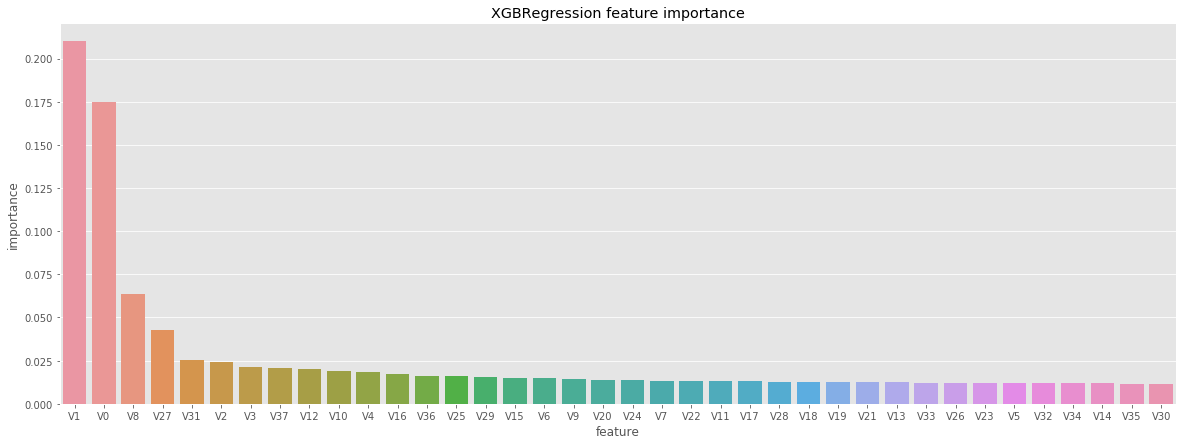

In [55]:
features_grid_sorted = pd.DataFrame({'feature':list(X_train.columns),
                                    'importance':best_model_XBG.feature_importances_}).sort_values('importance', ascending=False)
plt.figure(figsize=(20, 7))
# features_grid_sorted.plot(kind='barh')
sns.barplot(x=features_grid_sorted['feature'], y=features_grid_sorted['importance'])
plt.title('XGBRegression feature importance')
plt.show()

In [59]:
drop_columns = ['V37', 'V5', 'V11', 'V22', 'V24',  'V15', 'V31', 'origin']
# for column in drop_columns:
manual_test = test_df.drop(['origin'], axis=1)
# manual_test.head()
predicted = best_model_XBG.predict(manual_test)
# test_df.iloc[:,:-1].head()

In [60]:
# 保存预测结果
np.savetxt('./predicted_res/xgb_pre_test_del.txt',fmt='%.7f',X = predicted,
       delimiter = ' ',newline = '\n',header='')

In [62]:
temp_str = "This dries my hair faster that bigger, more powerful models. I love travel blow dryers because they are easy to lift and they usually come in 1600 w or less. Bigger dryers are heavy and blow my hair everywhere. This has a surprising amount of power and is very compact. I would give it a five except that the switch is not easy to turn on and off with one hand and it's noisier than I anticipated."

In [63]:
temp_str

"This dries my hair faster that bigger, more powerful models. I love travel blow dryers because they are easy to lift and they usually come in 1600 w or less. Bigger dryers are heavy and blow my hair everywhere. This has a surprising amount of power and is very compact. I would give it a five except that the switch is not easy to turn on and off with one hand and it's noisier than I anticipated."